In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# The Precision-Recall AUC score can be calculated using the auc() function in scikit-learn, taking the precision and recall values as arguments.
from sklearn.metrics import precision_recall_curve,auc, roc_curve, classification_report, average_precision_score, roc_auc_score, precision_score, recall_score, f1_score


In [20]:
data1 = pd.read_csv(r'E:\DAV MS\Dissertation\borg_traces_data2.csv', index_col= 0)
data1.head()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,rr_cpus,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0.000000e+00,2,9.459124e+10,3,1,200,0.000000e+00,144,1.688460e+11,0.020660,...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,2.517310e+12,2,2.606980e+11,2,0,360,2.214950e+11,335,8.551509e+07,0.007240,...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,1.956840e+11,6,2.762270e+11,2,0,103,0.000000e+00,376,1.693220e+11,0.048584,...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,0.000000e+00,2,1.050739e+10,3,0,200,0.000000e+00,1977,1.782950e+11,0.070435,...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,1.810630e+12,3,2.591162e+10,2,0,0,0.000000e+00,3907,2.313650e+11,0.002449,...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405894 entries, 0 to 405893
Data columns (total 31 columns):
time                               405894 non-null float64
instance_events_type               405894 non-null int64
collection_id                      405894 non-null float64
scheduling_class                   405894 non-null int64
collection_type                    405894 non-null int64
priority                           405894 non-null int64
alloc_collection_id                405894 non-null float64
instance_index                     405894 non-null int64
machine_id                         405894 non-null float64
rr_cpus                            405120 non-null float64
rr_memory                          405120 non-null float64
collection_logical_name            405894 non-null object
start_after_collection_ids         405894 non-null object
vertical_scaling                   404935 non-null float64
scheduler                          404935 non-null float64
start_time      

## Data preprocessing 

In [22]:
data1.isnull().sum()

time                                    0
instance_events_type                    0
collection_id                           0
scheduling_class                        0
collection_type                         0
priority                                0
alloc_collection_id                     0
instance_index                          0
machine_id                              0
rr_cpus                               774
rr_memory                             774
collection_logical_name                 0
start_after_collection_ids              0
vertical_scaling                      959
scheduler                             959
start_time                              0
end_time                                0
au_cpus                                 0
au_memory                               0
mx_cpus                                 0
mx_memory                               0
assigned_memory                         0
page_cache_memory                       0
cycles_per_instruction            

In [23]:
data1.shape

(405894, 31)

## Treating missing values

In [24]:
data1.cycles_per_instruction = data1.cycles_per_instruction.fillna(data1.cycles_per_instruction.mean())

In [25]:
data1.memory_accesses_per_instruction = data1.memory_accesses_per_instruction.fillna(data1.memory_accesses_per_instruction.mean())

In [26]:
data1.vertical_scaling  = data1.vertical_scaling .fillna(data1.vertical_scaling .mean())

In [27]:
data1.scheduler = data1.scheduler.fillna(data1.scheduler.mean())

In [29]:
data1.rr_cpus = data1.rr_cpus.fillna(data1.rr_cpus.mean())

In [30]:
data1.rr_memory = data1.rr_memory.fillna(data1.rr_memory.mean())

In [31]:
data1.isnull().sum()

time                               0
instance_events_type               0
collection_id                      0
scheduling_class                   0
collection_type                    0
priority                           0
alloc_collection_id                0
instance_index                     0
machine_id                         0
rr_cpus                            0
rr_memory                          0
collection_logical_name            0
start_after_collection_ids         0
vertical_scaling                   0
scheduler                          0
start_time                         0
end_time                           0
au_cpus                            0
au_memory                          0
mx_cpus                            0
mx_memory                          0
assigned_memory                    0
page_cache_memory                  0
cycles_per_instruction             0
memory_accesses_per_instruction    0
sample_rate                        0
cpu_usage_distribution             0
t

In [32]:
data1.describe()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,rr_cpus,...,au_cpus,au_memory,mx_cpus,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cluster,failed
count,4.058940e+05,405894.000000,4.058940e+05,405894.000000,405894.000000,405894.000000,4.058940e+05,405894.000000,4.058940e+05,405894.000000,...,405894.000000,405894.000000,405894.000000,405894.000000,405894.000000,405894.000000,405894.000000,405894.000000,405894.000000,405894.000000
mean,6.927463e+13,2.945983,3.590897e+11,1.266870,0.087782,147.913793,7.021799e+10,5034.756259,8.491885e+10,0.015336,...,0.007446,0.005640,0.025352,0.008927,0.000398,2.185379,0.010722,0.999223,4.563613,0.228331
std,2.507511e+16,2.045794,2.446122e+11,1.014087,0.282977,116.656633,1.673475e+11,11848.537486,1.377903e+11,0.028618,...,0.018567,0.016559,0.052681,0.024937,0.000550,1.045529,0.006454,0.010239,2.208008,0.419757
min,0.000000e+00,0.000000,6.824000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.252846,0.000125,0.110000,1.000000,0.000000
25%,2.674750e+11,2.000000,2.125500e+11,0.000000,0.000000,103.000000,0.000000e+00,401.000000,2.932044e+09,0.004051,...,0.000200,0.000238,0.000794,0.000196,0.000008,1.354252,0.006084,1.000000,3.000000,0.000000
50%,1.084800e+12,3.000000,3.108870e+11,1.000000,0.000000,105.000000,0.000000e+00,1380.000000,2.008985e+10,0.008102,...,0.001049,0.001282,0.005005,0.002693,0.000227,2.185379,0.010722,1.000000,5.000000,0.000000
75%,1.766120e+12,5.000000,4.918810e+11,2.000000,0.000000,200.000000,0.000000e+00,4200.000000,1.318590e+11,0.015839,...,0.007286,0.004257,0.029724,0.006683,0.000539,2.672982,0.013702,1.000000,6.000000,0.000000
max,9.223370e+18,10.000000,8.258530e+11,3.000000,1.000000,450.000000,7.426670e+11,177107.000000,8.254270e+11,0.583008,...,0.538086,0.223877,1.271484,0.286133,0.008453,105.275932,0.084292,1.000000,8.000000,1.000000


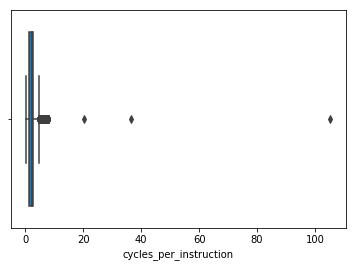

In [33]:
sns.boxplot(x='cycles_per_instruction', data=data1)

In [34]:
Q1=data1['cycles_per_instruction'].quantile(0.25) #treating outlier
Q3=data1['cycles_per_instruction'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

1.3542524580000002
2.6729815009999998
1.3187290429999996
-0.6238411064999994 4.651075065499999


In [35]:
data1 = data1[data1['cycles_per_instruction']< Upper_Whisker]


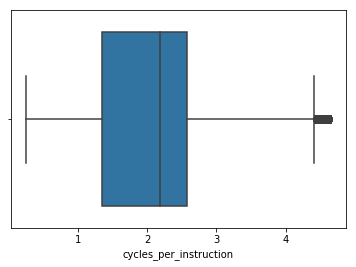

In [36]:
sns.boxplot(x='cycles_per_instruction', data=data1)

In [37]:
data1.describe()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,rr_cpus,...,au_cpus,au_memory,mx_cpus,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cluster,failed
count,4.009930e+05,400993.000000,4.009930e+05,400993.000000,400993.000000,400993.000000,4.009930e+05,400993.000000,4.009930e+05,400993.000000,...,400993.000000,400993.000000,400993.000000,400993.000000,400993.000000,400993.000000,400993.000000,400993.000000,400993.000000,400993.000000
mean,7.010435e+13,2.937635,3.585935e+11,1.273795,0.088854,148.257034,7.099025e+10,5074.717352,8.516764e+10,0.015399,...,0.007517,0.005683,0.025359,0.008931,0.000398,2.142997,0.010562,0.999219,4.589569,0.228111
std,2.522788e+16,2.045759,2.449708e+11,1.013377,0.284534,117.016648,1.681660e+11,11912.116919,1.379843e+11,0.028770,...,0.018667,0.016649,0.052772,0.025054,0.000548,0.957443,0.006297,0.010179,2.202395,0.419615
min,0.000000e+00,0.000000,6.824000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.252846,0.000125,0.454545,1.000000,0.000000
25%,2.647890e+11,2.000000,2.119730e+11,0.000000,0.000000,103.000000,0.000000e+00,408.000000,2.932065e+09,0.004051,...,0.000200,0.000237,0.000794,0.000196,0.000008,1.345655,0.005924,1.000000,3.000000,0.000000
50%,1.082450e+12,3.000000,3.090300e+11,1.000000,0.000000,105.000000,0.000000e+00,1389.000000,1.996546e+10,0.008102,...,0.001049,0.001291,0.005005,0.002625,0.000226,2.185379,0.010722,1.000000,5.000000,0.000000
75%,1.761230e+12,5.000000,4.802820e+11,2.000000,0.000000,200.000000,0.000000e+00,4240.000000,1.334660e+11,0.015625,...,0.007324,0.004387,0.029846,0.006622,0.000540,2.574192,0.013117,1.000000,6.000000,0.000000
max,9.223370e+18,10.000000,8.258530e+11,3.000000,1.000000,450.000000,7.426670e+11,177107.000000,8.254270e+11,0.583008,...,0.538086,0.223877,1.271484,0.286133,0.008453,4.644095,0.084292,1.000000,8.000000,1.000000


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400993 entries, 0 to 405893
Data columns (total 31 columns):
time                               400993 non-null float64
instance_events_type               400993 non-null int64
collection_id                      400993 non-null float64
scheduling_class                   400993 non-null int64
collection_type                    400993 non-null int64
priority                           400993 non-null int64
alloc_collection_id                400993 non-null float64
instance_index                     400993 non-null int64
machine_id                         400993 non-null float64
rr_cpus                            400993 non-null float64
rr_memory                          400993 non-null float64
collection_logical_name            400993 non-null object
start_after_collection_ids         400993 non-null object
vertical_scaling                   400993 non-null float64
scheduler                          400993 non-null float64
start_time      

In [39]:
failed_event = pd.DataFrame(data1["failed"].value_counts()) 


In [40]:
failed_event # 1 is failed events

,failed
0,309522
1,91471


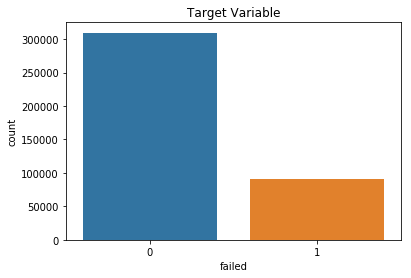

In [41]:
plt.title("Target Variable")
sns.countplot(x="failed", data=data1)

In [42]:
Num_cluster= pd.DataFrame(data1["cluster"].value_counts())
Num_cluster

,cluster
6,58501
3,58471
4,54978
7,50091
5,48481
8,46931
2,42024
1,41516


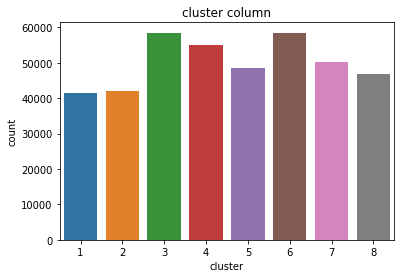

In [43]:
plt.title("cluster column")
sns.countplot(x="cluster", data=data1)

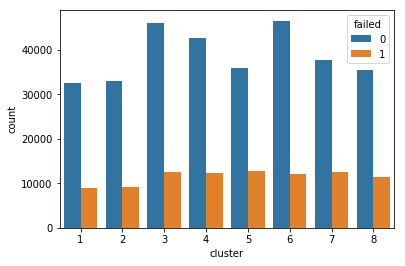

In [44]:
sns.countplot(x="cluster", data=data1, hue='failed') # n seaborn, the hue parameter represents which column in the data frame, you want to use for color encoding.

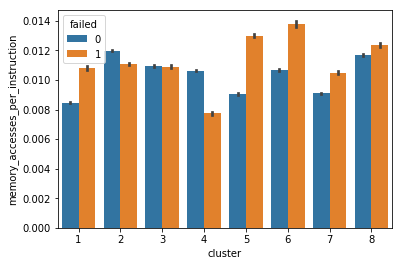

In [51]:
sns.barplot(x="cluster", y='memory_accesses_per_instruction', data=data1,hue='failed' )
plt.show()

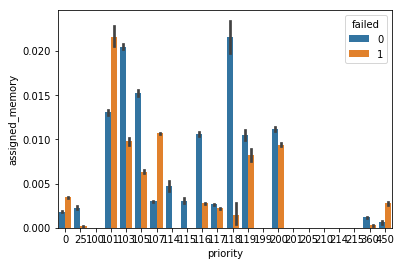

In [52]:
sns.barplot(x="priority", y="assigned_memory", data=data1, hue= "failed")
plt.show()

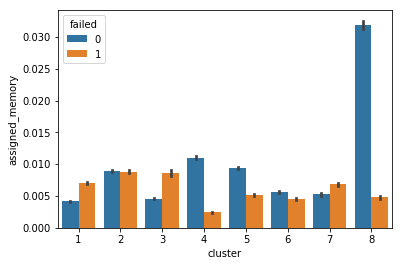

In [53]:
sns.barplot(x="cluster", y="assigned_memory", data=data1, hue="failed")
plt.show()

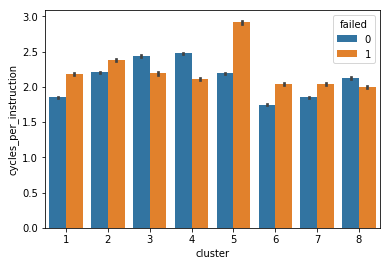

In [54]:
sns.barplot(x="cluster", y="cycles_per_instruction", data=data1, hue="failed")
plt.show()

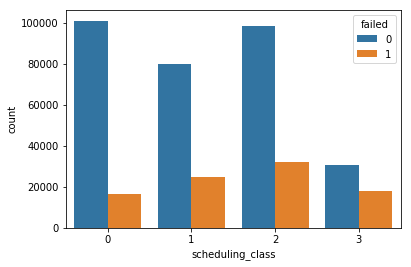

In [55]:
sns.countplot(x="scheduling_class",data=data1, hue='failed')
plt.show()

In [56]:
data1.shape

(400993, 31)

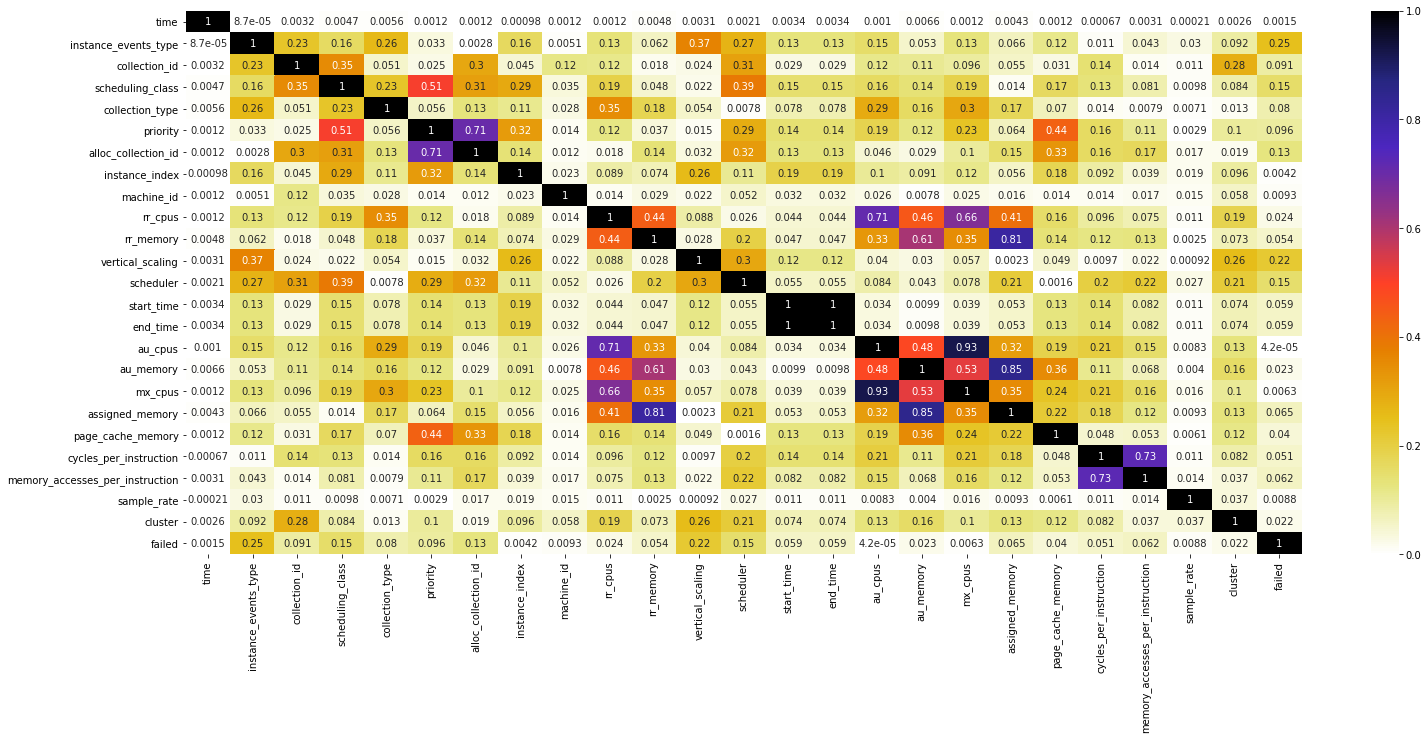

In [57]:
import seaborn as sns
plt.figure(figsize=(25,10))
cor_matrix = data1.corr().abs()
sns.heatmap(cor_matrix,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()


In [58]:
 # Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print()

In [115]:
 #Find features with correlation greater than 0.6
to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>0.6)]
print(to_drop)

['alloc_collection_id', 'end_time', 'au_cpus', 'au_memory', 'mx_cpus', 'assigned_memory', 'memory_accesses_per_instruction']


In [65]:
data1.dtypes



time                               float64
instance_events_type                 int64
collection_id                      float64
scheduling_class                     int64
collection_type                      int64
priority                             int64
alloc_collection_id                float64
instance_index                       int64
machine_id                         float64
rr_cpus                            float64
rr_memory                          float64
collection_logical_name             object
start_after_collection_ids          object
vertical_scaling                   float64
scheduler                          float64
start_time                         float64
end_time                           float64
au_cpus                            float64
au_memory                          float64
mx_cpus                            float64
mx_memory                           object
assigned_memory                    float64
page_cache_memory                  float64
cycles_per_

In [69]:
data2= data1.drop(['vertical_scaling','scheduler','start_after_collection_ids', 'mx_cpus','cpu_usage_distribution','tail_cpu_usage_distribution',
               'end_time','event'],axis=1)

In [70]:
data2.shape

(400993, 23)

In [116]:
#CONVERTING CATEGORICAL TO NUMERICAL DATA
colname=data2.columns[:]
colname

Index(['time', 'instance_events_type', 'collection_id', 'scheduling_class',
       'collection_type', 'priority', 'alloc_collection_id', 'instance_index',
       'machine_id', 'rr_cpus', 'rr_memory', 'collection_logical_name',
       'start_time', 'au_cpus', 'au_memory', 'mx_memory', 'assigned_memory',
       'page_cache_memory', 'cycles_per_instruction',
       'memory_accesses_per_instruction', 'sample_rate', 'cluster', 'failed'],
      dtype='object')

In [72]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder() # It can also be used to transform non-numerical labels

for x in colname:
    data2[x] = le.fit_transform(data2[x]) #This method performs fit and transform on the input data at a single time 
    #and converts the data points. If we use fit and transform separate when we need both then it will decrease the
    #efficiency of the model so we use fit_transform() which will do both the work.
data2.dtypes


time                               int64
instance_events_type               int64
collection_id                      int64
scheduling_class                   int64
collection_type                    int64
priority                           int64
alloc_collection_id                int64
instance_index                     int64
machine_id                         int64
rr_cpus                            int64
rr_memory                          int64
collection_logical_name            int32
start_time                         int64
au_cpus                            int64
au_memory                          int64
mx_memory                          int32
assigned_memory                    int64
page_cache_memory                  int64
cycles_per_instruction             int64
memory_accesses_per_instruction    int64
sample_rate                        int64
cluster                            int64
failed                             int64
dtype: object

In [73]:
## for mutiple predictors
X=data2.loc[:, data2.columns!='failed']

In [74]:
y= data2['failed']


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score



In [77]:
#SPLIT THE DATA INTO TEST AND TRAIN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=10)


In [78]:
print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(280695, 22) (120298, 22) (280695,) (120298,)


In [80]:
#CREATE A MODEL
clf_lr= LogisticRegression()

In [81]:
#FITTING TRAINING DATA TO THE MODEL (TRAINING THE MODEL)
clf_lr.fit(X_train,y_train)

E:\IMARTICUS FOLDER\CODES\Python codes\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
clf_lr.coef_ #  slope values for all X's i.e B1

array([[-1.09161455e-05, -3.49733394e-03, -2.13496846e-04,
         1.89662695e-04, -2.24179035e-04,  5.17985872e-04,
         3.82159851e-03,  2.03353988e-05, -9.97582715e-07,
        -5.04982771e-05, -2.15529410e-05, -9.63410989e-05,
         2.94909263e-04,  1.56668353e-05,  3.92115273e-04,
        -2.70054698e-04,  2.20737410e-04, -7.05856486e-04,
         1.80938774e-04, -3.16900020e-05, -1.07322254e-02,
        -9.34711343e-04]])

In [83]:
clf_lr.intercept_ #its value of of beta0

array([-0.0001003])

In [84]:
#TESTING THE MODEL
y_test_pred=clf_lr.predict(X_test)

In [85]:
confusion_matrix(y_test,y_test_pred)

array([[89518,  3205],
       [23589,  3986]], dtype=int64)

In [86]:
accuracy_score(y_test,y_test_pred)

0.7772697800462186

In [87]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     92723
           1       0.55      0.14      0.23     27575

   micro avg       0.78      0.78      0.78    120298
   macro avg       0.67      0.55      0.55    120298
weighted avg       0.74      0.78      0.72    120298



In [88]:
#Import Neural Network library
from sklearn.neural_network import MLPClassifier



In [89]:
nn_model2 = MLPClassifier(hidden_layer_sizes=(10,15,10), activation='relu', solver='lbfgs', alpha=0.001,
                        learning_rate='adaptive',random_state=10).fit(X_train, y_train)

In [90]:
nn_model2

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 15, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
# Predict using built model
predict_train = nn_model2.predict(X_train)
predict_test = nn_model2.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[213797   3002]
 [ 57789   6107]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88    216799
           1       0.67      0.10      0.17     63896

   micro avg       0.78      0.78      0.78    280695
   macro avg       0.73      0.54      0.52    280695
weighted avg       0.76      0.78      0.71    280695



In [93]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[91528  1195]
 [24892  2683]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     92723
           1       0.69      0.10      0.17     27575

   micro avg       0.78      0.78      0.78    120298
   macro avg       0.74      0.54      0.52    120298
weighted avg       0.76      0.78      0.71    120298



In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [103]:
classifier = Sequential()


In [104]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 22))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


E:\IMARTICUS FOLDER\CODES\Python codes\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=22, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
E:\IMARTICUS FOLDER\CODES\Python codes\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
E:\IMARTICUS FOLDER\CODES\Python codes\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [106]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 30)

E:\IMARTICUS FOLDER\CODES\Python codes\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Epoch 1/30
280695/280695 [==============================] - 73s 261us/step - loss: 0.4596 - accuracy: 0.8107
Epoch 2/30
280695/280695 [==============================] - 70s 249us/step - loss: 0.4207 - accuracy: 0.8159
Epoch 3/30
280695/280695 [==============================] - 63s 225us/step - loss: 0.4060 - accuracy: 0.8166
Epoch 4/30
280695/280695 [==============================] - 62s 221us/step - loss: 0.4055 - accuracy: 0.8158
Epoch 5/30
280695/280695 [==============================] - 62s 220us/step - loss: 0.3995 - accuracy: 0.8179
Epoch 6/30
280695/280695 [==============================] - 61s 219us/step - loss: 0.3994 - accuracy: 0.8176
Epoch 7/30
280695/280695 [==============================] - 60s 215us/step - loss: 0.3959 - accuracy: 0.8185
Epoch 8/30
280695/280695 [==============================] - 68s 241us/step - loss: 0.3937 - accuracy: 0.8187
Epoch 9/30
280695/280695 [==============================] - 69s 245us/step - loss: 0.3910 - accuracy: 0.8187
Epoch 10/30
280695

In [107]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [108]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[82037 10686]
 [ 9092 18483]]


0.8355916141581738

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     92723
           1       0.63      0.67      0.65     27575

   micro avg       0.84      0.84      0.84    120298
   macro avg       0.77      0.78      0.77    120298
weighted avg       0.84      0.84      0.84    120298

